# Module 8: Dimensionality Reduction
## Case Study – 1

### Understand and practice principal component analysis using scikit learn. 

In [19]:
# 1. Scikit learn comes with the pre-loaded dataset, load the digits dataset from 
# that collection and write a helper function to plot the image using matplotlib. 
# [Hint: Explore datasets module from scikit learn] 

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

# 1.
# Step 2: Load the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)
print(digits.target_names[[0]])
print(digits.images[[0]])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

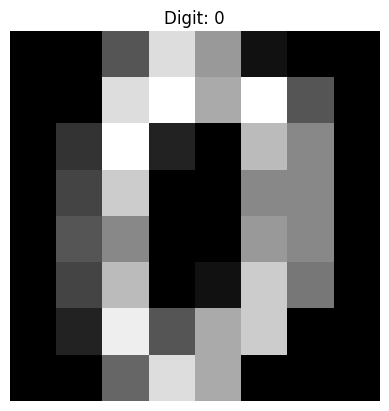

In [67]:
# Helper function to plot an image
def plot_digit_image(index):
    # Select the image at the given index
    image = digits.images[index]
    label = digits.target[index]
    
    # Plot the image with matplotlib
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')
    plt.show()

# Test the function
plot_digit_image(0)


In [22]:
# Load the digits dataset
x = digits.data  # The feature data
y = digits.target  # The target labels
print(type(x))
#x

# Convert the features to a DataFrame
X_df = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# Add the target as a new column
X_df['target'] = digits.target

# Display the first few rows
print(X_df.head(12))

# Display summary information about the DataFrame
print(X_df.info())

'''
We have 1,797 instances in total.
Each instance represents an 8x8 pixel grayscale image (so each image has 64 pixels in a flattened form).
The pixel values range from 0 to 16, where higher values indicate brighter pixels.
The target variable represents the digit label (from 0 to 9) for each image, which we want the model to classify.
'''


<class 'numpy.ndarray'>
    pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0       0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1       0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2       0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3       0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4       0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   
5       0.0      0.0     12.0     10.0      0.0      0.0      0.0      0.0   
6       0.0      0.0      0.0     12.0     13.0      0.0      0.0      0.0   
7       0.0      0.0      7.0      8.0     13.0     16.0     15.0      1.0   
8       0.0      0.0      9.0     14.0      8.0      1.0      0.0      0.0   
9       0.0      0.0     11.0     12.0      0.0      0.0      0.0      0.0   
10      0.0      0.0      1.0      9.0     15.0     11.0      0.0      0.0   
11      0.0      0.0      0.0      0.0  

'\nWe have 1,797 instances in total.\nEach instance represents an 8x8 pixel grayscale image (so each image has 64 pixels in a flattened form).\nThe pixel values range from 0 to 16, where higher values indicate brighter pixels.\nThe target variable represents the digit label (from 0 to 9) for each image, which we want the model to classify.\n'

In [23]:
# 2. 
# Split the Dataset into Train and Test Sets
# 80-20 split for training and testing, as specified.
# Split the data: 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [24]:
# 2. 
# Fit a Logistic Regression Model
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')

# Fit the model to the training data
logistic_model.fit(x_train, y_train)


C:\Users\akram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='auto')

In [25]:
# 2. 
# Make Predictions and Evaluate Accuracy
# After training the model, let's use it to predict the test set and then calculate the accuracy.

# Predict on the test data
y_pred = logistic_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy * 100:.2f}%")


Accuracy of Logistic Regression Model: 97.50%


In [9]:
# 3.
# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the data
x_pca = pca.fit_transform(x)


In [28]:
x_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [17]:
# 3.
# Number of components to explain 95% of the variance
num_components = pca.n_components_
print(f"Number of components to explain 95% of variance: {num_components}")


Number of components to explain 95% of variance: 29


In [20]:
# Apply PCA to retain 95% of the variance
# Fitting PCA on the training data to find the principal components and then transforming both x_train and x_test based on these components.
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Fit logistic regression on the PCA-transformed data
# This part trains a logistic regression model on the reduced-dimensional data.
# Setting max_iter high ensures convergence, which is often necessary for higher-dimensional data.
logistic_model_pca = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')
logistic_model_pca.fit(x_train_pca, y_train)

# Predict on the test data and calculate accuracy
y_pred_pca = logistic_model_pca.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of Logistic Regression Model after PCA: {accuracy_pca * 100:.2f}%")
# The accuracy of 95.83% indicates the model performs well even after dimensionality reduction.


Accuracy of Logistic Regression Model after PCA: 95.83%


C:\Users\akram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[[32  0  1  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  1  0  1  0  0  0  0  1 37]]
[ 11  32  52 124 133 149 159 193 204 222 234 239 244 245 339]
Number of misclassified instances: 15


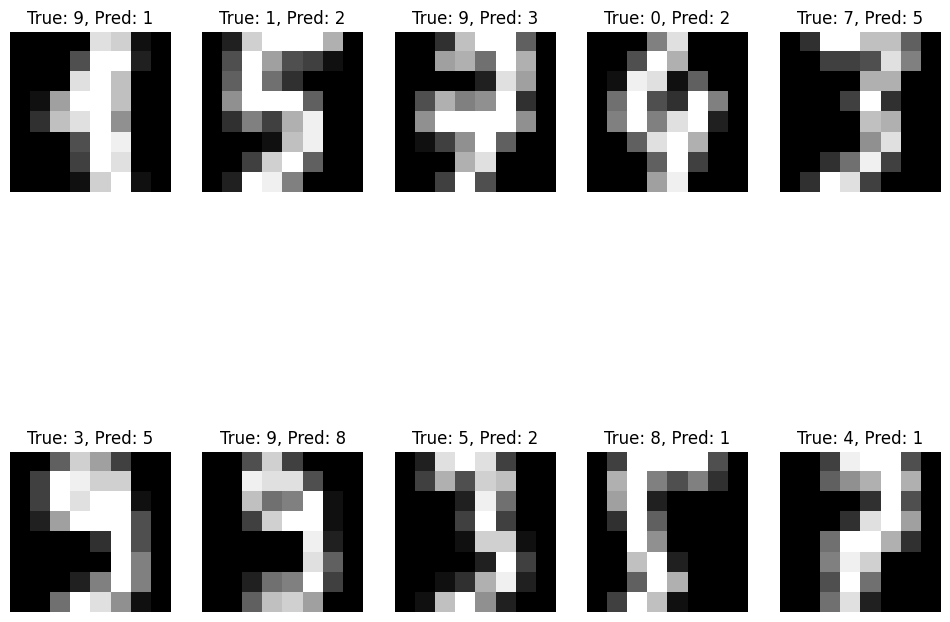

In [21]:
# 4. 
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)
print(conf_matrix)

# 5. 
# Identifying Misclassified Instances
# Calculate the number of misclassified instances
misclassified_indices = np.where(y_test != y_pred_pca)[0]
print(misclassified_indices)
num_misclassified = len(misclassified_indices)
print(f"Number of misclassified instances: {num_misclassified}")


def plot_misclassified_images(X, y_true, y_pred, indices, num_samples=10):
    """
    Plots misclassified images with their true and predicted labels.
    
    Parameters:
    - X: The original feature data.
    - y_true: The true labels.
    - y_pred: The predicted labels.
    - indices: Indices of misclassified samples.
    - num_samples: Number of samples to plot.
    """
    plt.figure(figsize=(12, 10))
    
    # Limit to num_samples misclassified images for display
    for i, idx in enumerate(indices[:num_samples]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_df.iloc[idx, :-1].values.reshape(8, 8), cmap='gray')
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')

    plt.show()

# Plot misclassified images
plot_misclassified_images(x_test, y_test, y_pred_pca, misclassified_indices)

# Explanation: This part identifies the indices where the true labels (y_test) do not match the predicted labels (y_pred_pca). 
# Printing these indices and the count of misclassified samples (15) is helpful for understanding model performance and potential misclassification patterns.


### Explanation
* PCA Transformation: We transformed x into x_pca, which now has 29 features instead of 64.
* Training on Reduced Data: We used the reduced feature set to train the logistic regression model.
* Model Accuracy: Despite the reduction in dimensions, the model should achieve high accuracy because the PCA retained 95% of the information (variance) in the data.

### Benefits of PCA in This Case
* Reduced Complexity: Fewer dimensions make the model simpler, potentially improving training speed and reducing the risk of overfitting.
* Retained Information: By retaining components that explain 95% of the variance, we ensure that most of the important information in the data is still available for the model.
* This is a common workflow in data science, where PCA helps reduce the dimensionality while preserving essential information, making the model efficient without losing accuracy significantly.